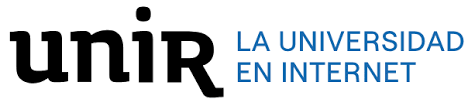

<hr style="border: none; height: 10px; background-color: blue; opacity:60%;">

<h2 style="text-align: center; font-weight: bold;">Asignatura: Percepción Computacional</h2>


<h2 style="text-align: center; font-weight: bold;">Actividad grupal: Evaluación de la segmentación</h2>

<h2 style="text-align: center; font-weight: bold;">Equipo 1073-H:</h2>

<h3 style="text-align: center;">Diego Alexis Galván Sandoval</h3>
<h3 style="text-align: center;">Marcos Miguel Lopéz Hernández</h3>
<h3 style="text-align: center;">Eduardo Alberto Domínguez Fontes</h3>
<h3 style="text-align: center;">Dennis Martin Herrera Herrera</h3>


<hr style="border: none; height: 10px; background-color: blue; opacity:60%;">


## Introducción

La segmentación de imágenes es una técnica en visión por computadora que divide una imagen digital en grupos distintos de píxeles (segmentos) para facilitar la detección de objetos y otras tareas asociadas. Al descomponer los datos visuales complejos de una imagen en segmentos con formas específicas, esta técnica permite un procesamiento de imágenes más ágil y avanzado.

Las metodologías de segmentación de imágenes varían desde enfoques heurísticos simples e intuitivos hasta técnicas avanzadas basadas en aprendizaje profundo. Los algoritmos tradicionales de segmentación analizan características visuales de alto nivel de cada píxel, como el color o el brillo, para determinar los límites de los objetos y las áreas de fondo. El aprendizaje automático, que utiliza conjuntos de datos etiquetados, se emplea para entrenar modelos que puedan clasificar con precisión los distintos tipos de objetos y regiones presentes en una imagen.

Debido a su versatilidad y utilidad en visión por computadora, la segmentación de imágenes tiene numerosas aplicaciones en inteligencia artificial, incluyendo el apoyo en el diagnóstico médico por imágenes, la automatización de la movilidad en la robótica y los vehículos autónomos, así como la identificación de objetos de interés en imágenes satelitales.

## Segmentación de imágenes vs. detección de objetos vs. clasificación de imágenes

La clasificación de imágenes asigna una etiqueta a toda la imagen en su conjunto. Por ejemplo, un modelo básico de clasificación podría ser entrenado para distinguir entre imágenes de "automóviles" y "camiones". Sin embargo, los sistemas tradicionales de clasificación de imágenes son menos detallados, ya que no analizan las características individuales de la imagen por separado.

La detección de objetos, por su parte, integra la clasificación de imágenes con la localización de los objetos dentro de la imagen. En lugar de etiquetar la imagen entera como “automóvil” o “camión”, un modelo de detección de objetos puede identificar en qué áreas específicas de la imagen se encuentran estos vehículos, usando “cuadros delimitadores” para señalar sus ubicaciones. Aunque la detección de objetos puede identificar múltiples elementos en una imagen y proporcionar una estimación de sus dimensiones, no puede definir con precisión los límites o las formas exactas de los objetos. Esto puede ser un inconveniente cuando los objetos están muy cercanos y sus cuadros delimitadores se superponen.

La segmentación de imágenes trabaja a nivel de píxel, utilizando técnicas diversas para asignar cada píxel a una clase o instancia específica. Las técnicas “clásicas” de segmentación analizan características intrínsecas de cada píxel, como el color y la intensidad (análisis heurístico), mientras que los métodos basados en aprendizaje profundo emplean redes neuronales avanzadas para identificar patrones complejos. Los resultados de esta segmentación son máscaras que delinean con precisión, píxel por píxel, los límites y las formas de cada clase en la imagen, que usualmente corresponde a distintos objetos, características o áreas.

En términos generales, la segmentación de imágenes se emplea en tres tipos principales de tareas: segmentación semántica, segmentación de instancias y segmentación panóptica.

## Objetivos

El objetivo de este trabajo es aprender a construir y evaluar el rendimiento de uno o más segmentadores. Esta actividad permitirá consolidar los conceptos sobre segmentación de imágenes aprendidos.


In [153]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.segmentation import slic
from skimage.color import label2rgb
from skimage.filters import threshold_niblack
from sklearn.metrics import classification_report

# Métodos de segmentación

## SLIC-Simple-Linear-Iterative-Clustering

Simple Linear Iterative Clustering, es un algoritmo diseñado para segmentar imágenes en superpíxeles, que son regiones compactas de píxeles que comparten características similares. A diferencia de otros métodos de segmentación, SLIC es conocido por ser eficiente y fácil de implementar.

El algoritmo funciona agrupando píxeles cercanos en color y espacio en grupos, utilizando una variante del algoritmo de k-means. Inicia dividiendo la imagen en una cuadrícula regular y luego ajusta iterativamente los bordes de estos grupos para asegurar que los píxeles dentro de cada superpíxel sean similares entre sí, tanto en términos de color como de proximidad espacial.

Una de las ventajas clave de SLIC es que permite controlar el tamaño y la forma de los superpíxeles a través de un parámetro que ajusta la importancia relativa del color versus la distancia espacial. Esto hace que SLIC sea flexible para diferentes tipos de imágenes y aplicaciones, desde la segmentación de objetos hasta la mejora de la compresión de imágenes.

Probamos este algoritmo acontinuación

In [154]:
img = cv.imread('mexico3.png')
mexgt = cv.imread('mexico3_35.png',cv.IMREAD_GRAYSCALE)

In [155]:
segments = slic(img, n_segments=1000, compactness=1000,channel_axis=-1,max_num_iter=100,sigma=1)
image_seg = label2rgb(segments, img, kind = 'avg')

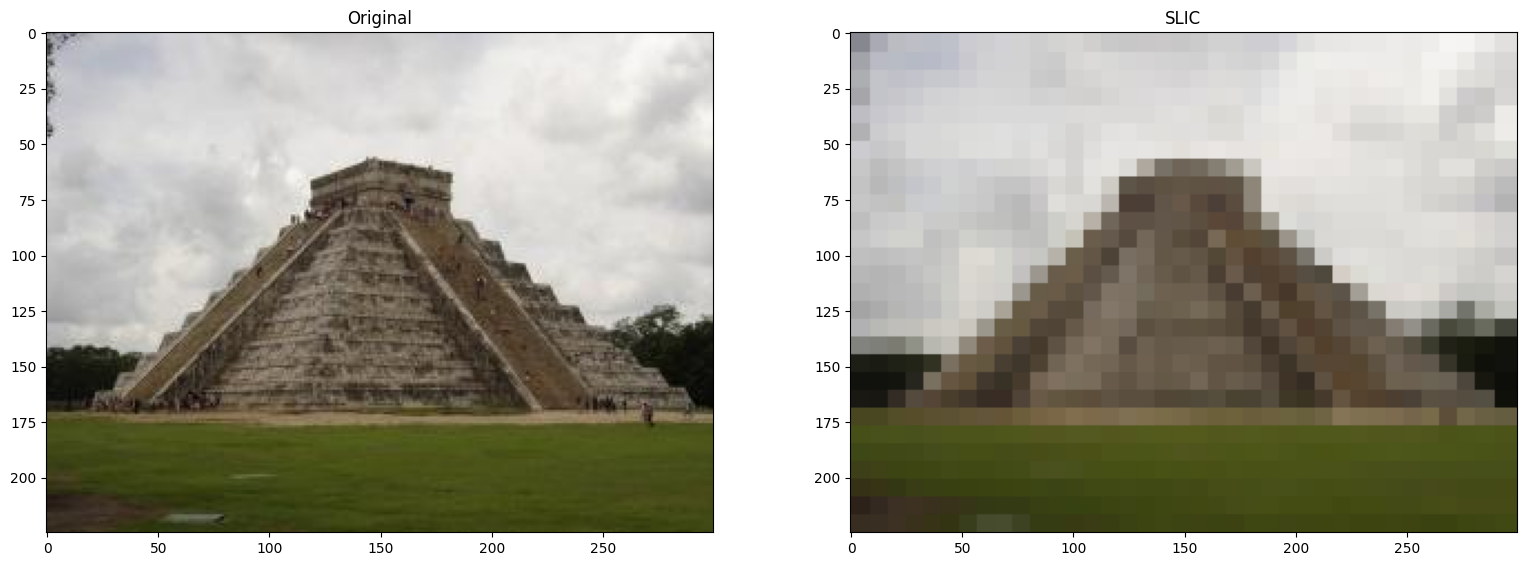

In [156]:
fig, ax = plt.subplots(1,2,figsize=(20,20))
plt.subplots_adjust(left=1,bottom=1,right=1.8,top=1.25, wspace=0.01, hspace=0.01)
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(image_seg,cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[1].set_title('SLIC')
plt.show()

## Método Niblack & Método Sauvola

#### Método Niblack
El método Niblack es una técnica de umbralización adaptativa utilizada en el procesamiento de imágenes, especialmente útil en casos donde hay variaciones de iluminación dentro de la misma imagen. A diferencia de los métodos de umbralización global, que aplican un único valor de umbral a toda la imagen, Niblack calcula un umbral local para cada píxel basado en la media y la desviación estándar de los píxeles en su vecindad inmediata.

Desarrollado por W. Niblack en 1986, este método se utiliza comúnmente en la binarización de documentos, especialmente aquellos que son antiguos o están deteriorados, donde la calidad de la imagen puede variar significativamente de una región a otra. La idea principal detrás de Niblack es ajustar el umbral en función de las características locales de la imagen, permitiendo una separación más efectiva entre el fondo y el primer plano en áreas con diferentes condiciones de iluminación. Esto lo convierte en una herramienta poderosa en aplicaciones donde los métodos tradicionales fallan al lidiar con contrastes no uniformes.

#### Método Sauvola
Por otra parte el método Sauvola es particularmente efectiva para la binarización de documentos que presentan variaciones de iluminación o contraste. Fue desarrollado por Jaakko Sauvola en 2000 y es una mejora sobre el método de Niblack.

A diferencia de los métodos de umbralización global que aplican un único valor de umbral a toda la imagen, el método Sauvola calcula un umbral local para cada píxel en función de la media y la desviación estándar de los píxeles en su vecindad inmediata. Esto permite que el umbral se adapte a las condiciones locales de iluminación, mejorando la separación entre el texto (o primer plano) y el fondo, especialmente en documentos deteriorados o escaneados en condiciones subóptimas.

In [157]:
mex = cv.imread('letter2_original.png',cv.IMREAD_GRAYSCALE)
mexgt = cv.imread('letters2_groundt.png',cv.IMREAD_GRAYSCALE)
mexgt = mexgt[:554,:660]
mexgt = (mexgt == 255).astype(np.uint8)

In [158]:
thresh_sauvola = threshold_sauvola(mex, window_size=41, k=.8)
mex_sauvola = (mex > thresh_sauvola)*1

In [159]:
thresh_niblack = threshold_niblack(mex, window_size=59, k=.8)
mex_niblack = (mex > thresh_niblack)*1

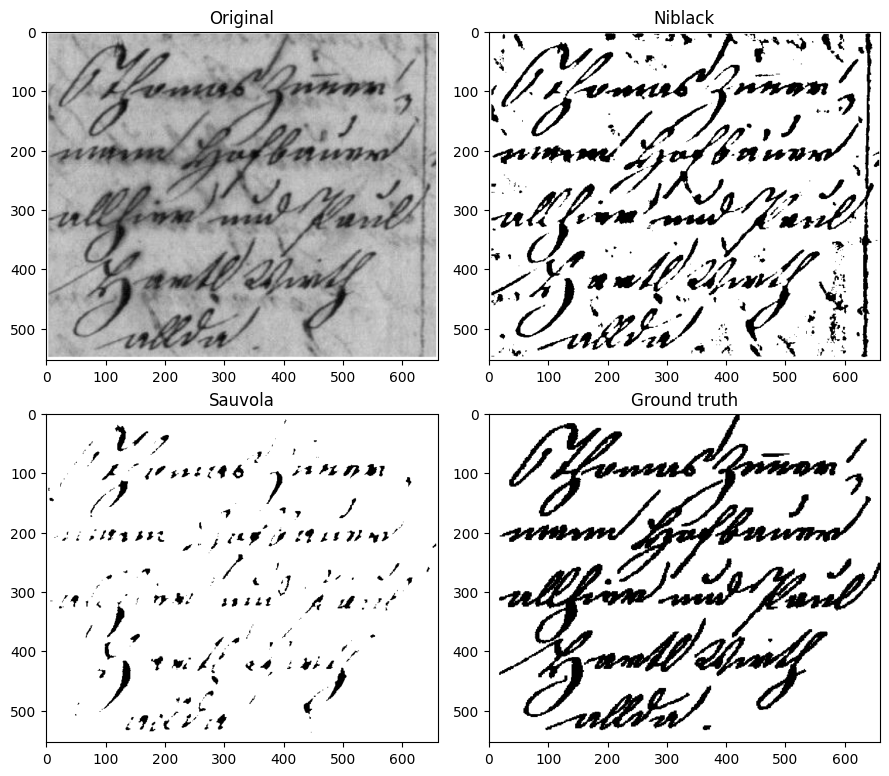

In [160]:
fig, ax = plt.subplots(2,2,figsize=(9,9))
#plt.subplots_adjust(left=1,bottom=1, wspace=0.01, hspace=0.01)
ax[0][0].imshow(cv.cvtColor(mex,cv.COLOR_BGR2RGB))
ax[0][1].imshow(mex_niblack,cmap=plt.cm.gray)
ax[1][0].imshow(mex_sauvola,cmap=plt.cm.gray)
ax[1][1].imshow(mexgt,cmap=plt.cm.gray)

ax[0][0].set_title('Original')
ax[0][1].set_title('Niblack')
ax[1][0].set_title('Sauvola')
ax[1][1].set_title('Ground truth')
plt.subplots_adjust(hspace=-0.4)
plt.tight_layout()
plt.show()

### Evaluación por el Índice de Similaridad de Dice (DSI)

$$ DSI =  2\frac{X \cap Y }{|X|+|Y|}$$

In [161]:
def dsi(image1, image2):
    image1 = image1 > 0
    image2 = image2 > 0
    intersection = np.sum(image1 & image2)
    sum_images = np.sum(image1) + np.sum(image2)
    if sum_images == 0:
        return 1.0  
    return 2.0 * intersection / sum_images

mexgtseg = (mexgtseg == 255).astype(np.uint8)
dsi = dice_similarity_coefficient(mexgt, mex_sauvola)
dsi2 = dice_similarity_coefficient(mexgt, mex_niblack)
print(f"Dice Similarity Index. Sauvola: {dsi:.4f}")
print(f"Dice Similarity Index. Niblack: {dsi2:.4f}")

NameError: name 'mexgtseg' is not defined

## Método Otsu

Esta técnica se centra en la búsqueda de un umbral `t` óptimo que separa los píxeles de una imagen binarizada en dos clases distintas: fondo y objeto. Esto lo logra a partir de minimizar la varianza intra-clase (haciendo que los píxeles dentro de cada clase sean lo más homogéneos posible) o bien, maximizando la varianza inter-clase (haciendo que las dos clases sean lo más diferentes posible entre sí) entre las dos clases de la segmentación.

Es especialmente útil en escenarios donde la diferencia de intensidad entre el objeto y el fondo es clara, pero no es tan efectivo en imágenes con iluminación no uniforme o ruido significativo.

Los pasos que realiza este método para lograr la segmentación son los siguientes:

1. Calcula el histograma de la imagen y las probabilidades de cada nivel de gris como:

        P(i) = total de píxeles con nivel de gris `i` / total de píxeles

2. Establece las variables de probabilidad acumulada del fondo y del objeto, media acumulada y media total.

3. Itera sobre los posibles umbrales de t, calculando las probabilidades acumuladas de cada clase y su respectivo promedio acumulado y la varianza inter-clase.

4. Selecciona el umbral óptimo que maximiza la varianza inter-clase (minimizando la varianza intra-clase).

5. Segmenta la imagen a través del umbral encontrado, que separa el objeto del fondo.

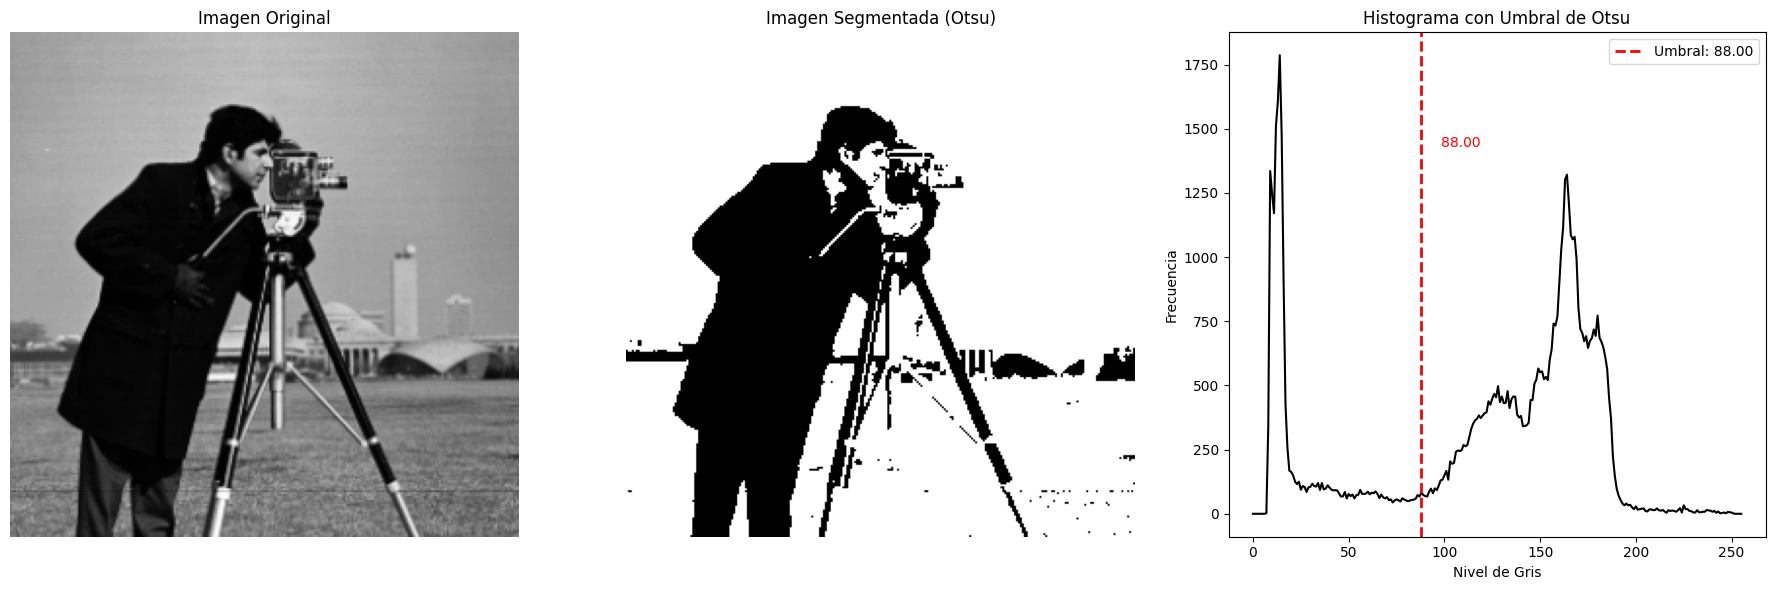

In [ ]:
# Cargar la imagen en escala de grises
image = cv2.imread('otsu_img.png', cv2.IMREAD_GRAYSCALE)

# Aplicar el método de Otsu
umbral, imagen_otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Calcular el histograma de la imagen
histograma = np.histogram(image, bins=256, range=(0, 255))[0]

# Mostrar la imagen original, la imagen segmentada, y el histograma con el umbral
plt.figure(figsize=(18, 6))

# Imagen original
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Imagen segmentada
plt.subplot(1, 3, 2)
plt.imshow(imagen_otsu, cmap='gray')
plt.title('Imagen Segmentada (Otsu)')
plt.axis('off')

# Histograma
plt.subplot(1, 3, 3)
plt.plot(histograma, color='black')
plt.axvline(ret, color='red', linestyle='dashed', linewidth=2, label=f"Umbral: {ret:.2f}")
plt.text(umbral + 10, max(histograma) * 0.8, f'{umbral:.2f}', color='red')
plt.title('Histograma con Umbral de Otsu')
plt.xlabel('Nivel de Gris')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.legend()
plt.show()


Como podemos observar, eel método Otsu logró segmentar relativamente bien el objeto de la imagen con un valor de umbral de 88, ya que aún se tienen ciertas siletas del fondo en la segmentación final.
Por lo tanto, para una primer aproxación se tiene un buen resultado.

Ahora, a partir de una imagen Ground Truht (Una imagen que se supone bien segmentada) se realiza una comparacion con la imagen obtenida del método de Otsu. Esto se hace con la finalidad de poder calificar el desempeño del método a partir de distintas medidas de dessempeño.

Para calificar el segmentador, podemos hacer uso de distintas métricas de desempeño:

 - accuracy: Mide la proporción de mediciones correctas en el modelo (Se usa principalmente cuando los datos muestran un equilibrio de clases).

 - precision: Mide la proporción de predicciones positivas que son realmente positivas.

 - recall: Aquí tenemos dos opciones, la sensibilidad y la especificidad. La sensibilidad mide la proporción de casos positivos que el modelo identifica correctamente (verdaderos positivos). La especificidad mide la proporción de casos negativos que el modelo identifica correctamente (verdaderos negativos).

 - f1: El F1-score es la media armónica de la precisión y la sensibilidad.

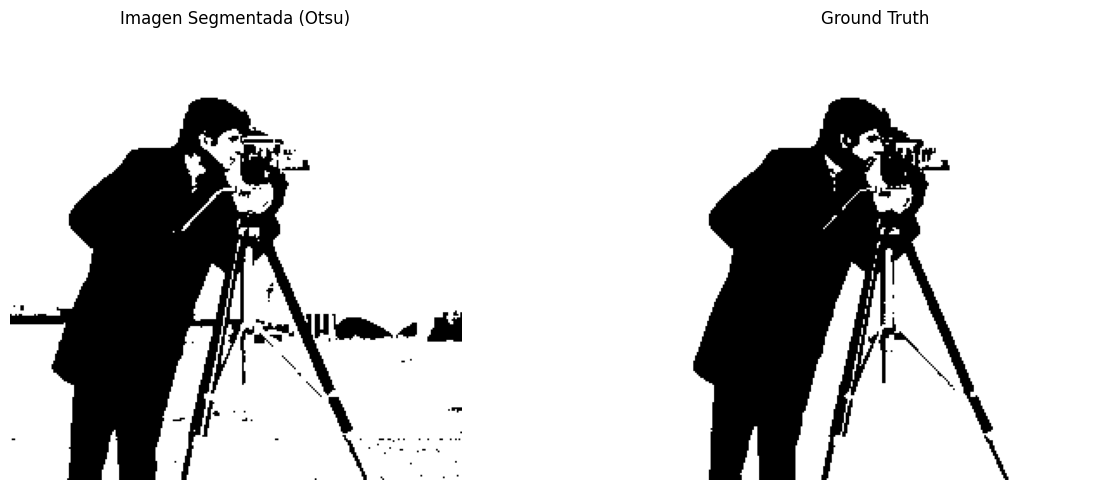

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     17116
         255       0.99      0.97      0.98     50483

    accuracy                           0.97     67599
   macro avg       0.95      0.97      0.96     67599
weighted avg       0.97      0.97      0.97     67599



In [ ]:

# Cargar la imagen de ground truth
ground_truth = cv2.imread('ground_truht2.png', cv2.IMREAD_GRAYSCALE)

# Binarizar la imagen
_, ground_truth_b = cv2.threshold(ground_truth, 127, 255, cv2.THRESH_BINARY)

# Convertir las imágenes a vectores de 1D para cálculo de métricas
otsu_1d = imagen_otsu.flatten()
gt = ground_truth_b.flatten()

# Calcular y mostrar el reporte de clasificación
reporte = classification_report(gt, otsu_1d)

# Visualización
plt.figure(figsize=(14, 5))

# Imagen segmentada
plt.subplot(1, 2, 1)
plt.imshow(imagen_otsu, cmap='gray')
plt.title('Imagen Segmentada (Otsu)')
plt.axis('off')

# Ground truth
plt.subplot(1, 2, 2)
plt.imshow(ground_truth_b, cmap='gray')
plt.title('Ground Truth')
plt.axis('off')
plt.tight_layout()
plt.show()

# Imprimimos el reporte de clasificación
print(reporte)

El segmentador tiene un rendimiento muy bueno, con una precisión general del 97%. Esto indica que el método de segmentación utilizado es efectivo para distinguir entre las áreas de fondo y las de objeto en la imagen, como se puede ver en las imágenes comparadas, solo por algunas siluetas que aún se ven de fondo.

 - Precisión:

        Clase 0: La precisión es de 0.92, lo que indica que el 92% de los píxeles predichos como clase 0 son correctos.
        Clase 255: La precisión es de 0.99, lo que indica que el 99% de los píxeles predichos como clase 255 son correctos.
        
      Esto sugiere que el segmentador es muy bueno para evitar falsos positivos en la clase de los píxeles (255).

 - Recall:

        Clase 0: El recall es de 0.96, lo que indica que el 96% de los píxeles de la clase 0 han sido correctamente identificados.
        Clase 255: El recall es de 0.97, lo que significa que el 97% de los píxeles de la clase 255 han sido correctamente identificados.
      Esto indica que el segmentador es efectivo para encontrar la mayoría de los píxeles de cada clase, especialmente los píxeles (255).

 - F1-score:

       Clase 0: El F1-score es de 0.94, lo que muestra un buen equilibrio entre precisión y recall.
       Clase 255: El F1-score es de 0.98, mostrando un excelente equilibrio entre precisión y recall para esta clase.

 - Accuracy:

       La precisión general es de 0.97, lo que significa que el 97% de todos los píxeles han sido clasificados correctamente.


## Métodos Morfológicos

Podemos utilizar dos métodos morfológicos (Dilatación y Erosión) para ver si se puede mejorar de cierta manera el rendimiento del segmentador Otsu, estos dos metodos consisten en :

 - Dilatación: La dilatación es una operación morfológica que amplía las regiones blancas en una imagen binarizada. Es decir, agrega píxeles al contorno de los objetos, lo que puede ayudar a rellenar pequeños huecos y conectar áreas disjuntas dentro del objeto segmentado. La dilatación se realiza aplicando un elemento estructurante sobre la imagen, que expande los píxeles blancos en la imagen binaria. Esto puede ser útil para mejorar la cohesión de las regiones segmentadas y reducir las irregularidades en los bordes del objeto.

 - Erosión: La erosión es una operación morfológica que reduce las regiones blancas en una imagen binarizada. Se aplica un elemento estructurante sobre la imagen, que elimina los píxeles en el borde de los objetos blancos, lo que ayuda a eliminar el ruido y las pequeñas irregularidades. La erosión puede ser útil para eliminar pequeñas manchas de fondo que permanecen después de la segmentación, y para suavizar los contornos de los objetos segmentados.

 En este caso utilizaremos un elemento estructurante (kernel) de 3x3 con una sola iteración sobre la imagen producida por el segmentador Otsu.

[]

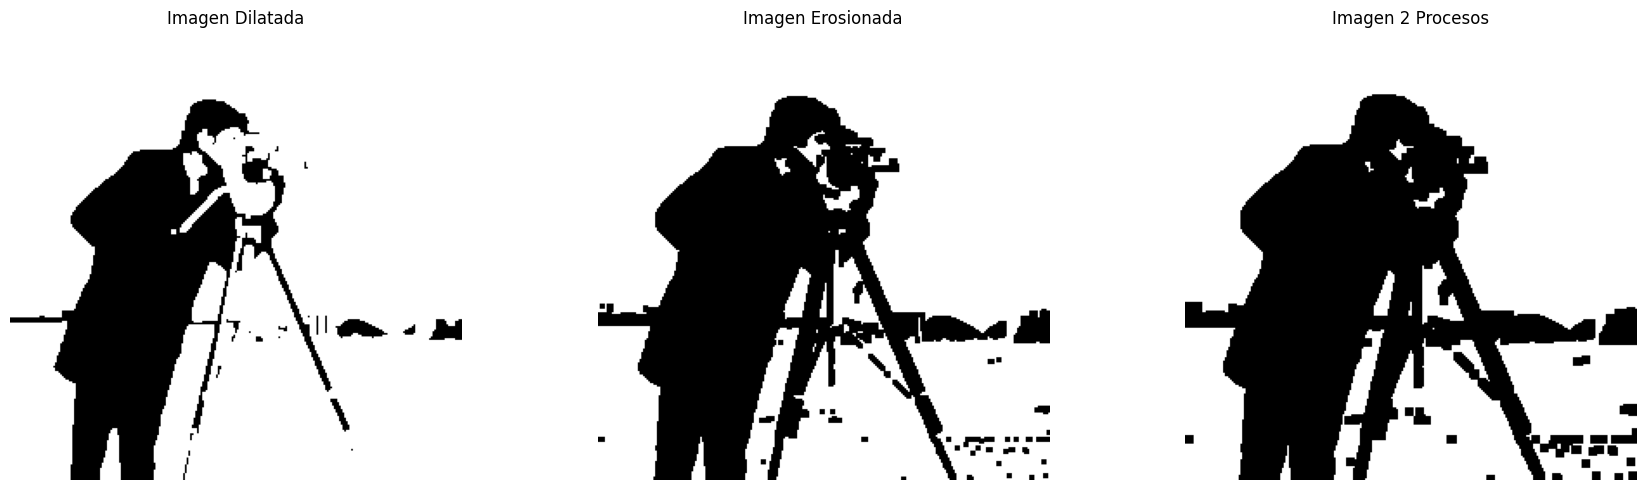

In [ ]:
# Definir el elemento estructurante
kernel = np.ones((3, 3), np.uint8)
# Dilatación
imagen_dilatada = cv.dilate(imagen_otsu, kernel, iterations=1)
# Erosión
imagen_erosionada = cv.erode(imagen_otsu, kernel, iterations=1)
# Dos métodos
imagen_2_procesos = cv.erode(imagen_erosionada, kernel, iterations=1)

# Graficamos las nuevas imagenes
plt.figure(figsize=(18, 5))

# Imagen dilatada
plt.subplot(1, 3, 1)
plt.imshow(imagen_dilatada, cmap='gray')
plt.title('Imagen Dilatada')
plt.axis('off')
# Imagen erosionada
plt.subplot(1, 3, 2)
plt.imshow(imagen_erosionada, cmap='gray')
plt.title('Imagen Erosionada')
plt.axis('off')
# Imagen 2 metodos
plt.subplot(1, 3, 3)
plt.imshow(imagen_2_procesos, cmap='gray')
plt.title('Imagen 2 Procesos')
plt.axis('off')
plt.tight_layout()
plt.plot()


In [ ]:
# Convertimos las imágenes a vectores de 1D para poder calcular las métricas:
imagen_dilatada_1d = imagen_dilatada.flatten()
imagen_erosionada_1d = imagen_erosionada.flatten()
imagen_2_procesos_1d = imagen_2_procesos.flatten()

# Calcular y mostrar el reporte de clasificación
reporte_dilatada = classification_report(gt, imagen_dilatada_1d)
reporte_erosionada = classification_report(gt, imagen_erosionada_1d)
reporte_2_procesos = classification_report(gt, imagen_2_procesos_1d)

# Imprimimos las métricas obtenidas
print("Métricas Imagen Dilatada")
print(reporte_dilatada)

print("\n")
print("Métricas Imagen Erosionada")
print(reporte_erosionada)

print("\n")
print("Métricas Imagen con 2 Procesos")
print(reporte_2_procesos)
print("\n")

Métricas Imagen Dilatada
              precision    recall  f1-score   support

           0       0.96      0.82      0.88     17116
         255       0.94      0.99      0.96     50483

    accuracy                           0.94     67599
   macro avg       0.95      0.90      0.92     67599
weighted avg       0.95      0.94      0.94     67599



Métricas Imagen Erosionada
              precision    recall  f1-score   support

           0       0.79      1.00      0.88     17116
         255       1.00      0.91      0.95     50483

    accuracy                           0.93     67599
   macro avg       0.89      0.95      0.92     67599
weighted avg       0.95      0.93      0.93     67599



Métricas Imagen con 2 Procesos
              precision    recall  f1-score   support

           0       0.70      1.00      0.82     17116
         255       1.00      0.85      0.92     50483

    accuracy                           0.89     67599
   macro avg       0.85      0.93      0.

# Análisis de las métricas a partir de aplicar métodos morfológicos

Ya que hemos obtenido las métricas al aplicar la dilatación y la erosión a la imagen obtenida con el segmentador Otsu, podemos concluir lo siguiente:

1. Método Otsu:
   - Mejor rendimiento general (accuracy 0.97)
   - Balance más equilibrado entre precisión y recall para ambas clases

2. Imagen Dilatada:
   - Segundo mejor rendimiento (accuracy 0.94)
   - Mayor precisión para clase 0, menor recall
   - Ligeramente menor precisión para clase 255, pero mayor recall

3. Imagen Erosionada:
   - Tercer mejor rendimiento (accuracy 0.93)
   - Menor precisión para clase 0, pero recall perfecto
   - Precisión perfecta para clase 255, menor recall

4. Imagen con 2 Procesos:
   - Rendimiento más bajo (accuracy 0.89)
   - Menor precisión para clase 0, recall perfecto
   - Precisión perfecta para clase 255, menor recall

Esto nos dice que la imagen obtenida solo con el segmentador Otsu proporciona los mejores resultados generales, mientras que las técnicas de procesamiento afectan el balance entre precisión y recall de manera diferente para cada clase.

## Referencias

1. Russell, B. C., Torralba, A., Murphy, K. P., & Freeman, W. T. (2008). LabelMe: A database and web-based tool for image annotation. International Journal of Computer Vision, 77(1-3), 157-173.

2. Yang, Z., Zuo, S., Zhou, Y., He, J., & Shi, J. (2024). A review of document binarization: Main techniques, new challenges, and trends. *Electronics, 13*(7), 1394. https://doi.org/10.3390/electronics13071394

3. Xing, J., Yang, P., & Qingge, L. (2020). Automatic thresholding using modified valley emphasis. *IET Image Processing, 14*. https://doi.org/10.1049/iet-ipr.2019.0176

4. IBM. (2024). ¿Qué es la segmentación de imágenes? https://www.ibm.com/mx-es/topics/image-segmentation